In [3]:
# Importing Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import os

# package to ignore warnings

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

## Importing Data

In [4]:
#Import Data
pd.set_option('display.max_rows', None) #using this line to display all rows for better reading
df1 = pd.read_csv("train.csv")

## Analyzing Data

In [5]:
#Take a glance at the data
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#let us check the num of rows and columns
df1.shape

(1460, 81)

In [7]:
#Let us check NULL values
df1.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [8]:
df1.info()

#we see the non-null count does not match 1460 number, there are certain missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
#lets us describe the data and analyze further
df1.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [10]:
# Checking if there are columns with one unique value since it won't affect our analysis
df1.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFin

## Preparing Data

In [11]:
df1.isnull().sum()

#as we can see there are so many variables with nu`ll values

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [12]:
#lets us treat the null values for variables

# LotFrontage       259  
# Alley            1369 
# BsmtQual           37 
# BsmtCond           37 
# BsmtExposure       38 
# BsmtFinType1       37 
# BsmtFinType2       38
# Electrical          1  
# FireplaceQu       690  
# GarageType         81 
# GarageYrBlt        81 
# GarageFinish       81 
# GarageQual         81 
# GarageCond         81
# PoolQC           1453   
# Fence            1179   
# MiscFeature      1406  
# MasVnrType          8  
# MasVnrArea          8 

In [13]:
#let us fill in the null values as following
df1['Alley'] = df1['Alley'].fillna('no_access')
df1['BsmtQual'] = df1['BsmtQual'].fillna('no_basement')
df1['BsmtCond'] = df1['BsmtCond'].fillna('no_basement')
df1['BsmtExposure'] = df1['BsmtExposure'].fillna('no_basement')
df1['BsmtFinType1'] = df1['BsmtFinType1'].fillna('no_basement')
df1['BsmtFinType2'] = df1['BsmtFinType2'].fillna('no_basement')
df1['Electrical'] = df1['Electrical'].fillna("Other")
df1['FireplaceQu'] = df1['FireplaceQu'].fillna('No_Fireplace')
df1['GarageType'] = df1['GarageType'].fillna('no_garage')
df1['GarageYrBlt'] = df1['GarageYrBlt'].fillna('no_garage')
df1['GarageFinish'] = df1['GarageFinish'].fillna('no_garage')
df1['GarageQual'] = df1['GarageQual'].fillna('no_garage')
df1['GarageCond'] = df1['GarageCond'].fillna('no_garage')
df1['PoolQC'] = df1['PoolQC'].fillna('no_pool')
df1['Fence'] = df1['Fence'].fillna('no_fence')
df1['MiscFeature'] = df1['MiscFeature'].fillna('None')
df1['MasVnrType'] = df1['MasVnrType'].fillna('None')
df1['MasVnrArea'] = df1['MasVnrArea'].fillna(0)

In [14]:
df1.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [15]:
# Let us drop LotFontgage column, we dont need it
df1.drop("LotFrontage",axis = 1, inplace=True)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Exploratory Data Analysis

In [17]:
## Let us perform uni and bivariate Analysis

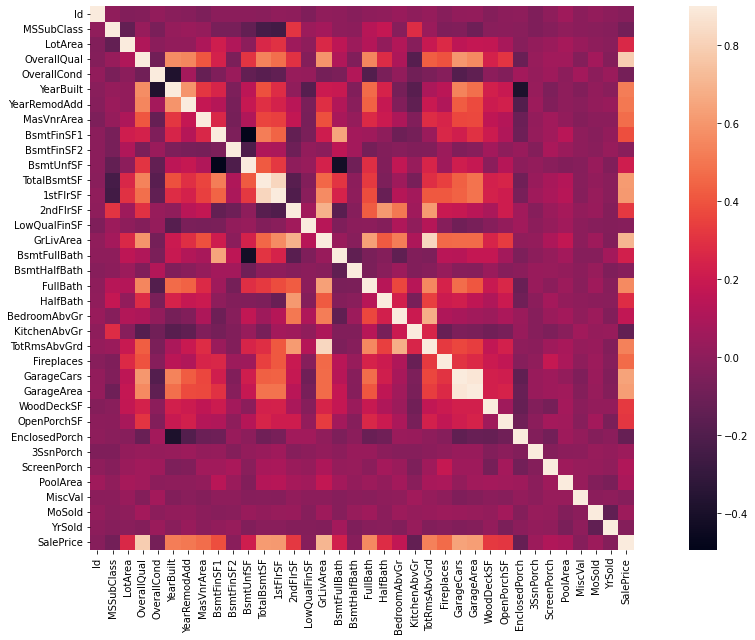

In [18]:
# plot a correlation matrix
matrix = df1.corr()
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(matrix, vmax=.9, square=True);

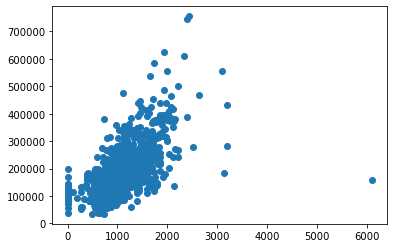

In [19]:
plt.scatter(df1.TotalBsmtSF,df1.SalePrice, plotnonfinite=False)

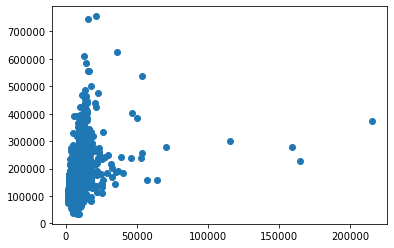

In [20]:
plt.scatter(df1.LotArea,df1.SalePrice, plotnonfinite=False)

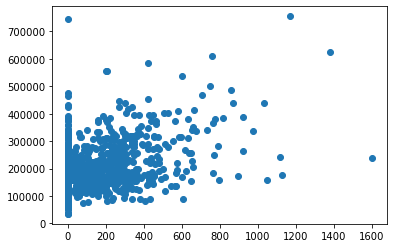

In [21]:
plt.scatter(df1.MasVnrArea,df1.SalePrice, plotnonfinite=False)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

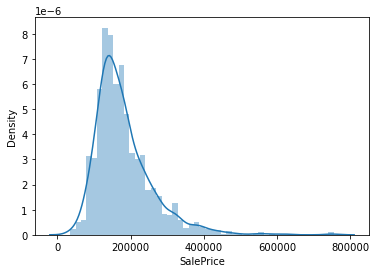

In [22]:
sns.distplot(df1['SalePrice'], hist=True)

<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

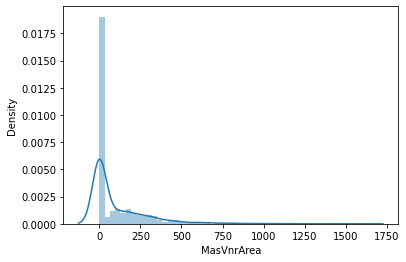

In [23]:
# plotting a distplot 
sns.distplot(df1['MasVnrArea'])

Text(0.5, 1.0, 'Street type')

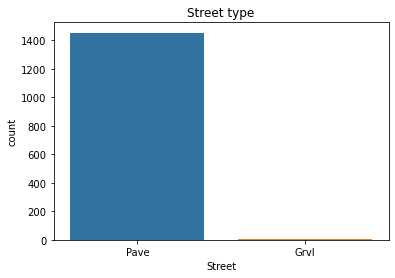

In [24]:
# checking street type

sns.countplot(x='Street', data= df1)
plt.title('Street type')

Text(0.5, 1.0, 'Lot')

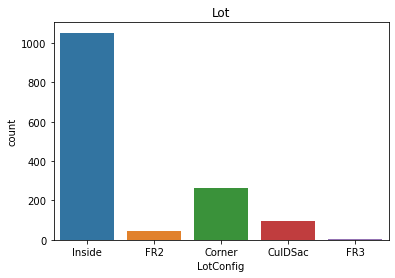

In [25]:
# check lot config

sns.countplot(x='LotConfig', data= df1)
plt.title('Lot')

Text(0.5, 1.0, 'Basement details')

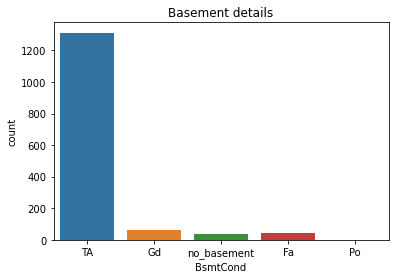

In [26]:
#basement details

sns.countplot(x='BsmtCond', data= df1)
plt.title('Basement details')

Text(0.5, 1.0, 'Overall situation')

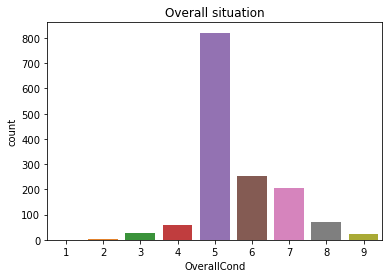

In [27]:
sns.countplot(x='OverallCond', data= df1)
plt.title('Overall situation')

# we see over all condition majority is '5' i.e average

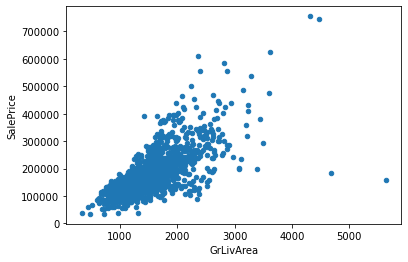

In [28]:
data = pd.concat([df1['SalePrice'], df1['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice');

# we see as ground level increases prices increase

## Preparing the data further

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

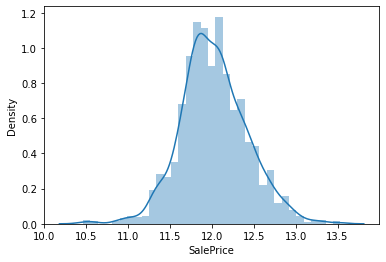

In [29]:
sns.distplot(np.log(df1["SalePrice"]))

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### ```Deriving Variables```

In [31]:
df1.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,no_access,Reg,Lvl,AllPub,Inside,...,0,no_pool,no_fence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,no_access,Reg,Lvl,AllPub,FR2,...,0,no_pool,no_fence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,no_access,IR1,Lvl,AllPub,Inside,...,0,no_pool,no_fence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,no_access,IR1,Lvl,AllPub,Corner,...,0,no_pool,no_fence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,no_access,IR1,Lvl,AllPub,FR2,...,0,no_pool,no_fence,None,0,12,2008,WD,Normal,250000


In [32]:
#turning values to numerical for better handelling

for x in df1['Street']:
    if x == 'Pave':
        df1['Street'] = 1
    else:
        df1['Street'] = 0
        

In [33]:
for x in df1['PavedDrive']:
    if x == 'Y':
        df1['PavedDrive'] = 1
    else:
        df1['PavedDrive'] = 0
        

In [34]:
for x in df1['CentralAir']:
    if x == 'Y':
        df1['CentralAir'] = 1
    else:
        df1['CentralAir'] = 0

In [35]:
df1.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,1,no_access,Reg,Lvl,AllPub,Inside,...,0,no_pool,no_fence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,1,no_access,Reg,Lvl,AllPub,FR2,...,0,no_pool,no_fence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,1,no_access,IR1,Lvl,AllPub,Inside,...,0,no_pool,no_fence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,1,no_access,IR1,Lvl,AllPub,Corner,...,0,no_pool,no_fence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,1,no_access,IR1,Lvl,AllPub,FR2,...,0,no_pool,no_fence,None,0,12,2008,WD,Normal,250000


In [36]:
values_concat = df1.select_dtypes(include=['object'])
values_concat.head()

,MSZoning,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,no_access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,2003.0,RFn,TA,TA,no_pool,no_fence,None,WD,Normal
1,RL,no_access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,1976.0,RFn,TA,TA,no_pool,no_fence,None,WD,Normal
2,RL,no_access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,2001.0,RFn,TA,TA,no_pool,no_fence,None,WD,Normal
3,RL,no_access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,1998.0,Unf,TA,TA,no_pool,no_fence,None,WD,Abnorml
4,RL,no_access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,2000.0,RFn,TA,TA,no_pool,no_fence,None,WD,Normal


In [37]:
#creating dummmies

dummy_data = pd.get_dummies(values_concat, drop_first=True)

In [38]:
dummy_data.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_Pave,Alley_no_access,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [39]:
## Droping the 'Id' column , as it is of no use 
df = df1.drop(['Id'],axis=1)

In [40]:
df

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,1,no_access,Reg,Lvl,AllPub,Inside,Gtl,...,0,no_pool,no_fence,None,0,2,2008,WD,Normal,208500
1,20,RL,9600,1,no_access,Reg,Lvl,AllPub,FR2,Gtl,...,0,no_pool,no_fence,None,0,5,2007,WD,Normal,181500
2,60,RL,11250,1,no_access,IR1,Lvl,AllPub,Inside,Gtl,...,0,no_pool,no_fence,None,0,9,2008,WD,Normal,223500
3,70,RL,9550,1,no_access,IR1,Lvl,AllPub,Corner,Gtl,...,0,no_pool,no_fence,None,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,1,no_access,IR1,Lvl,AllPub,FR2,Gtl,...,0,no_pool,no_fence,None,0,12,2008,WD,Normal,250000
5,50,RL,14115,1,no_access,IR1,Lvl,AllPub,Inside,Gtl,...,0,no_pool,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,10084,1,no_access,Reg,Lvl,AllPub,Inside,Gtl,...,0,no_pool,no_fence,None,0,8,2007,WD,Normal,307000
7,60,RL,10382,1,no_access,IR1,Lvl,AllPub,Corner,Gtl,...,0,no_pool,no_fence,Shed,350,11,2009,WD,Normal,200000
8,50,RM,6120,1,no_access,Reg,Lvl,AllPub,Inside,Gtl,...,0,no_pool,no_fence,None,0,4,2008,WD,Abnorml,129900
9,190,RL,7420,1,no_access,Reg,Lvl,AllPub,Corner,Gtl,...,0,no_pool,no_fence,None,0,1,2008,WD,Normal,118000


In [41]:
# Droping the original categorical column
df = df.drop(list(values_concat.columns), axis=1)

In [42]:
# Adding the dummy categorical column to original dataset
df = pd.concat([df,dummy_data], axis=1)

In [43]:
df.shape

(1460, 355)

# ```Train Test Split```

In [44]:
data_train,data_test = train_test_split(df, train_size=0.7,test_size = 0.3, random_state=100)

In [45]:
y_train_set = np.log(data_train.SalePrice)
X_train_set = data_train.drop("SalePrice",1)

y_test_set= np.log(data_test.SalePrice)
X_test_set = data_test.drop("SalePrice",1)

In [46]:
numerical_val=X_train_set.select_dtypes(include=['int64','float64']).columns
numerical_val

Index(['MSSubClass', 'LotArea', 'Street', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [47]:
# Let us scale the data now
scaler = StandardScaler()
X_train_set[numerical_val] = scaler.fit_transform(X_train_set[numerical_val])
X_test_set[numerical_val] = scaler.transform(X_test_set[numerical_val])

### Redge Regression

In [48]:
#let us write down alpha to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge()

folds = 4
cv_model = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'neg_mean_absolute_error', cv = folds, return_train_score=True, verbose = 1)            
cv_model.fit(X_train_set, y_train_set)

Fitting 4 folds for each of 26 candidates, totalling 104 fits


GridSearchCV(cv=4, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [49]:
print(cv_model.best_params_)
print(cv_model.best_score_)

{'alpha': 50}
-0.09219950614634417


In [50]:
cv_results = pd.DataFrame(cv_model.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.024315,3.352829e-03,0.007520,1.807902e-03,0.0001,{'alpha': 0.0001},-0.111711,-0.106809,-0.098514,-0.100321,-0.104338,0.005257,26,-0.048254,-0.048853,-0.049981,-0.049743,-0.049208,0.000693
1,0.026661,4.483732e-03,0.008273,2.283829e-03,0.001,{'alpha': 0.001},-0.108164,-0.105968,-0.098128,-0.100237,-0.103124,0.004086,25,-0.048294,-0.048862,-0.050026,-0.049765,-0.049237,0.000695
2,0.019300,4.324308e-04,0.006017,1.526624e-06,0.01,{'alpha': 0.01},-0.098186,-0.103366,-0.096798,-0.099433,-0.099446,0.002448,24,-0.048643,-0.048968,-0.050287,-0.049888,-0.049446,0.000666
3,0.024880,4.455282e-03,0.009526,2.185773e-03,0.05,{'alpha': 0.05},-0.095325,-0.102071,-0.095521,-0.097816,-0.097683,0.002716,23,-0.049828,-0.049307,-0.051131,-0.050817,-0.050271,0.000736
4,0.023857,4.368336e-03,0.007272,1.645586e-03,0.1,{'alpha': 0.1},-0.095215,-0.101338,-0.095015,-0.096871,-0.097110,0.002545,22,-0.051202,-0.049660,-0.052093,-0.052190,-0.051286,0.001015
5,0.024064,4.072642e-03,0.007019,1.228501e-03,0.2,{'alpha': 0.2},-0.095794,-0.100212,-0.094757,-0.095788,-0.096638,0.002106,21,-0.053406,-0.050385,-0.053855,-0.054679,-0.053081,0.001622
6,0.023814,2.954427e-03,0.007018,1.737363e-03,0.3,{'alpha': 0.3},-0.096446,-0.099452,-0.094978,-0.095344,-0.096555,0.001758,20,-0.055126,-0.051052,-0.055296,-0.056727,-0.054550,0.002113
7,0.023061,2.557017e-03,0.007269,1.643395e-03,0.4,{'alpha': 0.4},-0.096844,-0.098990,-0.095110,-0.094984,-0.096482,0.001624,19,-0.056509,-0.051636,-0.056454,-0.058390,-0.055747,0.002498
8,0.025317,4.033707e-03,0.007848,1.889794e-03,0.5,{'alpha': 0.5},-0.097051,-0.098594,-0.095293,-0.094767,-0.096426,0.001511,18,-0.057637,-0.052191,-0.057430,-0.059753,-0.056753,0.002786
9,0.024564,4.568534e-03,0.009024,1.736571e-03,0.6,{'alpha': 0.6},-0.097129,-0.098228,-0.095402,-0.094721,-0.096370,0.001386,17,-0.058629,-0.052696,-0.058269,-0.060865,-0.057615,0.003009


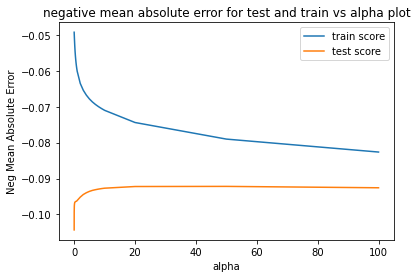

In [51]:
#negative mean absolute error for test and train vs alpha plot
cv_results['param_alpha'] = cv_results['param_alpha']
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])

plt.legend(['train score', 'test score'])

# labelling
plt.xlabel('alpha')
plt.ylabel('Neg Mean Absolute Error')
plt.title("negative mean absolute error for test and train vs alpha plot")
plt.show()

In [52]:
#final ridge model
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_set, y_train_set)

Ridge(alpha=20)

In [53]:
ridge.coef_

array([-2.30719234e-02,  1.79796732e-02,  0.00000000e+00,  8.36919694e-02,
        4.46551010e-02,  4.28627871e-02,  2.28060919e-02, -1.92608319e-03,
       -4.06785977e-04,  6.43300721e-03,  5.49240214e-03,  7.34898269e-03,
        0.00000000e+00,  3.51678236e-02,  3.93552519e-02,  1.38359597e-03,
        5.86355650e-02,  3.11508845e-02,  3.16322758e-03,  2.07348779e-02,
        1.15722282e-02,  1.06975431e-02, -1.25689035e-02,  1.91325446e-02,
        8.24919734e-03,  4.03498191e-02,  5.73831383e-03,  0.00000000e+00,
        1.40258674e-02, -3.67349400e-03,  9.19825233e-03,  7.37291223e-03,
        1.15751680e-02, -1.75132369e-02, -1.02255016e-03, -1.07502026e-03,
       -8.84111073e-03,  3.14772403e-02,  1.93111539e-02,  4.96494892e-02,
       -4.96634970e-03,  2.21404604e-02,  4.94480530e-04,  1.78600877e-02,
       -3.50372050e-02,  4.56697207e-03,  2.41863561e-02,  2.89577798e-02,
        3.62193457e-02, -5.95375696e-03,  3.55792271e-02, -2.24735866e-02,
       -3.77267165e-03, -

In [54]:
#let us calculate R squared on train set
y_train_set_pred = ridge.predict(X_train_set)
print(metrics.r2_score(y_true=y_train_set, y_pred=y_train_set_pred))

0.9187438627654031


In [55]:
# R squared on train is as above

In [56]:
#let us calculate R squared on test set
y_test_set_pred = ridge.predict(X_test_set)
print(metrics.r2_score(y_true=y_test_set, y_pred=y_test_set_pred))

0.8840942664663808


In [57]:
# R squared on test is as above

In [58]:
# Calculate root mean square error
mean_squared_error(y_test_set, y_test_set_pred)

0.0190711429018862

In [59]:
# Root mean square error is as above

### Lasso Regression

In [60]:
#lasso
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'neg_mean_absolute_error', cv = folds, return_train_score=True, verbose = 1)            

lasso_cv.fit(X_train_set, y_train_set)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [61]:
cv_results_l = pd.DataFrame(lasso_cv.cv_results_)

In [62]:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.0001}
-0.08509142914182276


In [63]:
#build final Lasso
alpha = 0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_set, y_train_set) 

Lasso(alpha=0.001)

In [64]:
#let us calculate R squared on train set
y_train_set_pred = lasso.predict(X_train_set)
print(metrics.r2_score(y_true=y_train_set, y_pred=y_train_set_pred))

0.9173394732781818


In [65]:
# R squared on train is as above

In [66]:
#let us calculate R squared on test set
y_test_set_pred = lasso.predict(X_test_set)
print(metrics.r2_score(y_true=y_test_set, y_pred=y_test_set_pred))

0.8532595815481028


In [67]:
# R squared on test is as above

In [68]:
# Calculate root mean square error
mean_squared_error(y_test_set, y_test_set_pred)

0.02414468555144414

In [69]:
# Root mean square error is as above

In [70]:
#pring lass coefficients
lasso.coef_

array([-0.01720512,  0.01687531,  0.        ,  0.0897217 ,  0.04816144,
        0.05916447,  0.02317176,  0.        ,  0.        ,  0.        ,
        0.        ,  0.02717963,  0.        ,  0.        ,  0.        ,
       -0.00199018,  0.11877122,  0.03101257,  0.00208311,  0.0127911 ,
        0.00882622,  0.00547357, -0.0126579 ,  0.01382136,  0.00794676,
        0.03889091,  0.00688561,  0.        ,  0.01286966, -0.00074053,
        0.00723927,  0.00513345,  0.01122294, -0.0136449 , -0.00097027,
       -0.00138549, -0.00638111,  0.00112395,  0.        ,  0.05532602,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.00467709, -0.        ,
        0.02832967, -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.00816405,  0.04236115,
       -0.        ,  0.10670641, -0.05664439, -0.        , -0.04463273,
       -0.        , -0.        , -0.        , -0.        , -0.  

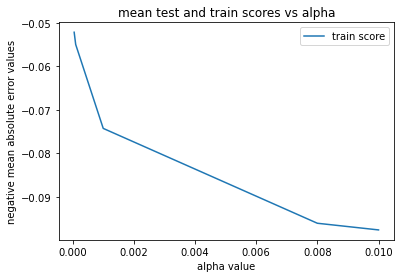

In [71]:
# mean test and train scores vs alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])

plt.title("mean test and train scores vs alpha")
plt.legend(['train score', 'test score'])

#Labelling
plt.xlabel('alpha value')
plt.ylabel('negative mean absolute error values')

plt.show()

In [72]:
cv_model.best_params_

{'alpha': 50}

In [73]:
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train_set,y_train_set)

y_pred_train = ridge.predict(X_train_set)
print(r2_score(y_train_set,y_pred_train))

y_pred_test = ridge.predict(X_test_set)
print(r2_score(y_test_set,y_pred_test))

0.9628949581298076
0.7369335463811936


In [74]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = data_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [75]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_set,y_train_set)

y_train_set_pred = lasso.predict(X_train_set)
y_test_set_pred = lasso.predict(X_test_set)

print(r2_score(y_true=y_train_set,y_pred=y_train_set_pred))
print(r2_score(y_true=y_test_set,y_pred=y_test_set_pred))

0.9173394732781818
0.8532595815481028


In conclusion the best alpha value for Lasso is 0.001
best Ridge value would be 0.1

Answering the main question 
after complete evaluation of the model and comparing both models generated by Redge and Lasso 
the feautures that best explain the data are

> MSZoning_FV

> MSZoning_RM

> MSSubClass

> Condition2_PosA

> RoofMatl_WdShngl

> MSZoning_RL

> RoofMatl_Membran

> MSZoning_RH